In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import os
import shutil
import time

In [25]:
dir_save = "../../.saves/" + "NDSolve start C decaying driving a=-2 b=1 beta0 = 1/" 

In [26]:
b_ = 1
a_ = -2
beta0 = 1
alpha0 = beta0/np.sqrt(b_)
#alpha0 = 1/np.sqrt(2)   # C_ini = 1 constant

In [27]:
def alpha(alpha0, t):
    t0 = 1/(2*a_*alpha0**2)
    return np.sign(alpha0)/np.sqrt(2*a_*(t0-t))
def beta(beta0, t):
    alpha0 = beta0/np.sqrt(b_) # Same sign chosen
    return np.sqrt(b_)*alpha(alpha0, t)# Create plot object


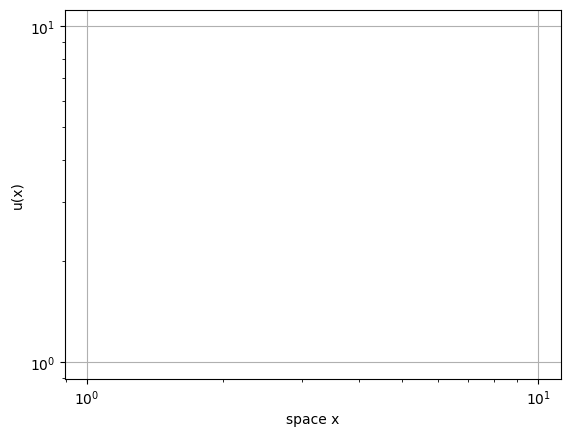

In [28]:
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
ax.grid()

In [29]:
# Compare the two values of beta(t)
beta_anal = []
beta_simul = []
ts = []

In [30]:
# Get all the simulations in the selected folder
# Rescale x->\chi and u->u_k with the ANALYTICAL expressions for alpha, beta
# Plot in the same canvas WITH the NDSolve solution for the u_k ODE
tinitial = 10

# Plot region
xmin = 500
xmax = 750

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    u = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            u[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            tmax = float(tmax) - tinitial
            L = N*dx
            
        i = i + 1

    x = x[0:i-1]
    u = u[0:i-1]

    if tmax > 0:
        #alpha_t = alpha(alpha0, tmax)
        beta_t = beta(beta0, tmax)
    else:
        #alpha_t = alpha0
        beta_t = beta0
    ts.append(tmax)
    
    #print("plateau = " + str(u[int(0.75*N)]))
    beta_simul.append(u[int(0.75*N)])   # Plateau value
    beta_anal.append(beta_t)            # Analytical expected value

    f.close()

../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710414982861
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710414991502
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415157720
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415169972
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415181268
../../.saves/NDSolve start C decaying driving a=-2 b=1 beta0 = 1/1710415261250


In [31]:
# Compare analytical beta with simulation plateau
ax.plot(ts, beta_simul, '*', label = "Plateau value")
ax.plot(ts, beta_anal, '.-', label = "Analytical beta(t)")

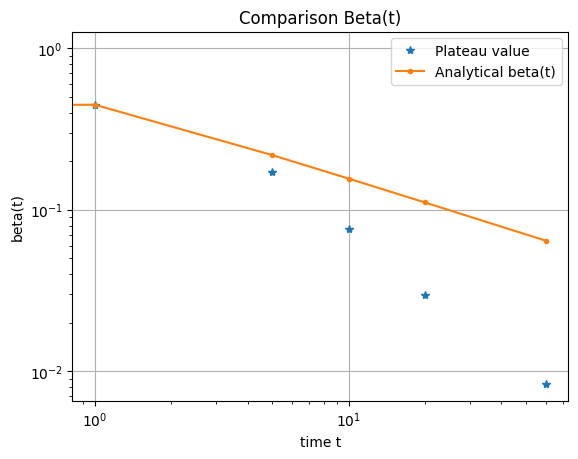

In [32]:
title = "Comparison Beta(t)"
ax.set_title(title)
ax.set_xlabel("time t")
ax.set_ylabel("beta(t)")
#ax.set_xlim(-3,3)
#ax.set_ylim(-0.6, 0.6)


ax.legend()
fig

In [33]:
beta_simul[0]

1.0000103926188362